## Trying a Markov Model with Framingham Data

Building a first multi-state model using the reshaped Framingham data.

The framingham_ms Dataset I created contains 10,132 state observations, defined as:

- state 1: No Disease
- state 2: Hypertension
- state 3: Cardiovascular disease
- state 4: Death
- state 99: Censored

The Framingham data was reshaped using Python 3 in a notebook entitled FraminghamReshaping.ipynb.

In [1]:
library("msm")

Warning message:
“package ‘msm’ was built under R version 3.6.3”

In [2]:
frmghm_ms <- read.csv("Datasets/framingham_ms.csv", header = TRUE, sep = ",") 
frmghm_ms

X     RANDID  AGE SEX CURSMOKE DIABETES STATE DAYS YEARS    
1      0     2448   39  1   0        0         1       0  0.000000
2      1     2448   57  1   0        0         3    6438 17.638356
3      2     2448   63  1   0        0        99    8766 24.016438
4      3     6238   46  2   0        0         1       0  0.000000
5      4     6238   70  2   0        0        99    8766 24.016438
6      5     9428   48  1   1        0         1       0  0.000000
7      6     9428   72  1   1        0        99    8766 24.016438
8      7    10552   61  2   1        0         2       0  0.000000
9      8    10552   67  2   1        0         3    2089  5.723288
10     9    10552   69  2   1        0         4    2956  8.098630
11    10    11252   46  2   1        0         1       0  0.000000
12    11    11252   58  2   1        0         2    4285 11.739726
13    12    11252   70  2   1        0        99    8766 24.016438
14    13    11263   43  2   0        0         2       0  0.000000
15    14    11263   59  2   0        1         3    5719 15.668493
16    15    12629   63  2   0        0         1       0  0.000000
17    16    12629   69  2   0        0         2    2212  6.060274
18    17    12629   87  2   0        0        99    8766 24.016438
19    18    12806   45  2   1        0         1       0  0.000000
20    19    12806   69  2   1        0         2    8679 23.778082
21    20    12806   69  2   1        0        99    8766 24.016438
22    21    14367   52  1   0        0         2       0  0.000000
23    22    14367   76  1   0        0        99    8766 24.016438
24    23    16365   43  1   1        0         2       0  0.000000
25    24    16365   67  1   0        0        99    8766 24.016438
26    25    16799   50  2   0        0         1       0  0.000000
27    26    16799   74  2   0        0        99    8766 24.016438
28    27    19304   43  2   0        0         1       0  0.000000
29    28    19304   67  2   0        0        99    8766 24.016438
30    29    20375   46  1   1        0         2       0  0.000000
...   ...   ...     ... ... ...      ...      ...   ...  ...      
10103 10102 9967157 78  1   0        0         4    7362 20.169863
10104 10103 9968499 43  1   1        0         1       0  0.000000
10105 10104 9968499 54  1   1        0         4    4177 11.443836
10106 10105 9969773 50  2   0        1         2       0  0.000000
10107 10106 9969773 72  2   0        1         3    7994 21.901370
10108 10107 9973350 51  2   1        0         2       0  0.000000
10109 10108 9973350 69  2   0        1         4    6562 17.978082
10110 10109 9978986 56  2   1        0         2       0  0.000000
10111 10110 9978986 80  2   0        0        99    8766 24.016438
10112 10111 9982118 58  1   0        0         2       0  0.000000
10113 10112 9982118 81  1   0        0         3    8346 22.865753
10114 10113 9982118 81  1   0        0         4    8457 23.169863
10115 10114 9983319 68  1   0        0         2       0  0.000000
10116 10115 9983319 70  1   0        0         4     565  1.547945
10117 10116 9984683 50  1   1        0         2       0  0.000000
10118 10117 9984683 55  1   1        0         3    1884  5.161644
10119 10118 9984683 62  1   1        0         4    4300 11.780822
10120 10119 9989287 51  1   1        0         1       0  0.000000
10121 10120 9989287 72  1   1        0         4    7746 21.221918
10122 10121 9990894 48  2   1        0         1       0  0.000000
10123 10122 9990894 66  2   1        0         4    6433 17.624658
10124 10123 9993179 44  2   1        0         1       0  0.000000
10125 10124 9993179 62  2   1        0         4    6729 18.435616
10126 10125 9995546 52  2   0        0         1       0  0.000000
10127 10126 9995546 66  2   0        0         3    5209 14.271233
10128 10127 9998212 40  1   0        0         2       0  0.000000
10129 10128 9998212 64  1   0        0        99    8766 24.016438
10130 10129 9999312 39  2   1        0         1     

## Define states and transitions allowed for model

Provide initial values representing a guess that there is an equal probability of progression, recovery or death (qrr = - SUM where s ne r of qrs).  

Or, supply the option "gen.inits=TRUE" in the msm function call.  This sets the initial values for non-zero entries of the Q matrix (transition intensity matrix) to the maximum likelihood estimates under the assumption that transitions take place only at observation times.

For transparency, I show the state table and MLE estimated Q matrix, and then set that to the qmatrix arg. given to msm.

In [3]:
twoway4.q <- rbind(c(0, 0.166, 0.166, 0.166), c(0, 0, 0.25, 0.25), c(0, 0, 0, 0.50), c(0,0,0,0))
statetable.msm(STATE, RANDID, data=frmghm_ms)
Q = crudeinits.msm(STATE ~ YEARS, RANDID, data=frmghm_ms, censor = 99, censor.states = c(1,2,3), qmatrix=twoway4.q)
Q

    to
from    1    2    3    4   99
   1    0 1178  435  523  781
   2    0    0  409  382 1685
   3    0    0    0  483   41

[,1]        [,2]        [,3]        [,4]      
[1,] -0.08217219  0.04531781  0.01673451 0.02011988
[2,]  0.00000000 -0.08272681  0.04277530 0.03995151
[3,]  0.00000000  0.00000000 -0.17186568 0.17186568
[4,]  0.00000000  0.00000000  0.00000000 0.00000000

In [4]:
# Each initial transition block must add up to -qrr (0.5) based on the assumption
# In state 1 there are 3 possible transitions - to hypertension (2), to cvd (3), or death (4)
# In state 2 there are 2 possible transitions - to cvd (3), or death (4)
# In state 3 there are 2 possible transition - to hypertension (2), or death (4)
# In state 4 there are no further transitions possible (obviously)


rownames(Q) <- colnames(Q) <- c("Well", "Hypertensive", "CVD", "Death")

In [5]:
frm.msm <- msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, censor = 99, 
               censor.states = c(1,2,3), exacttimes=TRUE)

In [6]:
frm.msm


Call:
msm(formula = STATE ~ YEARS, subject = RANDID, data = frmghm_ms,     qmatrix = Q, exacttimes = TRUE, censor = 99, censor.states = c(1,         2, 3))

Maximum likelihood estimates

Transition intensities
                            Baseline                     
Well - Well                 -0.048348 (-0.05044,-0.04634)
Well - Hypertensive          0.026774 ( 0.02529, 0.02835)
Well - CVD                   0.009887 ( 0.00900, 0.01086)
Well - Death                 0.011687 ( 0.01073, 0.01273)
Hypertensive - Hypertensive -0.021638 (-0.02320,-0.02018)
Hypertensive - CVD           0.011434 ( 0.01038, 0.01260)
Hypertensive - Death         0.010204 ( 0.00923, 0.01128)
CVD - CVD                   -0.150787 (-0.16485,-0.13792)
CVD - Death                  0.150787 ( 0.13792, 0.16485)

-2 * log-likelihood:  33006.48 
[Note, to obtain old print format, use "printold.msm"]

## Interpreting the Transition Intensities

- Mean time in the Well state: 1/0.048348 = 20.7 years
- Mean time in the Hypertensive state: 1/0.021638 = 46.2 years
- Mean time in the CVD state: 1/0.150787 = 6.6 years


- From the Well state, the likelihood of transition to Hypertensive is: 0.026774 (2.7%)
- From the Well state, the likelihood of transition to CVD is: 0.009887 (1%)
- From the Well state, the likelihood of transition to Death is 0.011687 (1.2%)


- From the Hypertensive state, the likelihood of transition to CVD is: 0.011434 (1.1%)
- From the Hypertensive state, the likelihood of transition to Death is: 0.010204 (1%)


- From the CVD state, the likelihood of transition to Death is: 0.150787 **(15%)**

In [7]:
# Display the Transition Probability Matrix, P(t) over an interval of t=1 (in this case, 1 year)
# ci = "normal" computes a confidence interval for P(t) by repeated sampling from the asymptotic 
# normal distribution of the maximum likelihood estimates of the log(qrs)
# Based on a default 1000 samples, converged to within 2 significant figures

# NOTE:
# ci = "boot" would instead compute intervals using nonparametric bootstrap resampling, drawn with replacement
# the model is refitted repeatedly to estimate the sampling uncertainty surrounding the estimates 
# more accurate, but slower

pmatrix.msm(frm.msm, t = 1, ci = "normal")

             Well                         Hypertensive                
Well         0.952802 (0.950877,0.954747) 0.025854 (0.024434,0.027327)
Hypertensive 0                            0.978594 (0.977075,0.979967)
CVD          0                            0                           
Death        0                            0                           
             CVD                          Death                       
Well         0.009096 (0.008285,0.009932) 0.012247 (0.011256,0.013276)
Hypertensive 0.010497 (0.009516,0.011543) 0.010909 (0.009896,0.011932)
CVD          0.860031 (0.847740,0.872052) 0.139969 (0.127948,0.152260)
Death        0                            1.000000 (1.000000,1.000000)

## Transition Probabilities

- The probability of being Well 1 year from now, given Well is 95%
- The probability of being Hypertensive 1 year from now, given Well is 2.6%
- The probability of being CVD 1 year from now, given Well is 1%
- The probability of being Dead 1 year from now, given Well is 1.2%


- The probability of being Hypertensive 1 year from now, given Hypertensive is 98%
- The probability of being CVD 1 year from now, given Hypertensive is 1%
- The probability of being Dead 1 year from now, given Hypertensive is 1%


- The probability of being CVD 1 year from now, given CVD is 86%
- The probability of being Dead 1 year from now, given CVD is 14%

In [8]:
# A model with covariates: sex, age, diabetes (yes or no) and smoker (yes or no)

frm.cov.msm <- msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, covariates = ~ AGE + SEX + DIABETES + CURSMOKE, 
                   qmatrix = Q, method = "BFGS", exacttimes = TRUE, censor = 99, 
                   censor.states = c(1,2,3), control = list(fnscale=30000, maxit=10000))

In [9]:
# Display hazard ratios for each covariate on each transition with 95% confidence intervals
hazard.msm(frm.cov.msm)

$AGE
                            HR         L        U
Well - Hypertensive  0.9921447 0.9849253 0.999417
Well - CVD           1.0501351 1.0383758 1.062028
Well - Death         1.0804299 1.0693343 1.091641
Hypertensive - CVD   1.0323343 1.0203634 1.044446
Hypertensive - Death 1.0444689 1.0320283 1.057059
CVD - Death          1.0575947 1.0464396 1.068869

$SEX
                            HR         L         U
Well - Hypertensive  1.3911257 1.2300475 1.5732974
Well - CVD           0.4857910 0.3982094 0.5926351
Well - Death         0.8128102 0.6821032 0.9685638
Hypertensive - CVD   0.5465520 0.4471017 0.6681235
Hypertensive - Death 0.6747354 0.5475552 0.8314555
CVD - Death          1.0177189 0.8388591 1.2347149

$DIABETES
                           HR         L        U
Well - Hypertensive  0.682291 0.3688394 1.262124
Well - CVD           2.698868 1.7662639 4.123897
Well - Death         1.349063 0.8036709 2.264571
Hypertensive - CVD   2.869117 1.9696528 4.179331
Hypertensive - Death 2.032872 1.3060256 3.164233
CVD - Death          1.570487 1.2261531 2.011519

$CURSMOKE
                            HR         L         U
Well - Hypertensive  0.7258119 0.6451897 0.8165086
Well - CVD           1.2585054 1.0323366 1.5342242
Well - Death         1.3850467 1.1566527 1.6585396
Hypertensive - CVD   1.2879425 1.0530418 1.5752422
Hypertensive - Death 1.1712762 0.9491025 1.4454581
CVD - Death          1.2521375 1.0286619 1.5241631

## Interpreting the (significant) Hazard Ratios


- 1 year increase in age is associated with a 5% increased risk of CVD onset (Well -> CVD)
- 1 year increase in age is associated with a 8% increased risk of Death (on average) (Well -> Death)
- 1 year increase in age is associated with a 3.2% increased risk of CVD onset, if Hypertensive (HTN -> CVD)
- 1 year increase in age is associated with a 4.4% increased risk of Death, if Hypertensive (HTN -> Death)
- 1 year increase in age is associated with a 5.8% increased risk of Death, if CVD (CVD -> Death)


- Being Female increases the risk of Hypertension onset (Well -> HTN) by 39% on average.
- Being Female decreases the risk of CVD onset (Well -> CVD) by 51% on average.
- Being Female decreases the risk of Death (Well -> Death) by 19% on average.
- Being Female decreases the risk of CVD, given HTN (HTN -> CVD) by 45% on average.
- Being Female decreases the risk of Death, given HTN (HTN -> Death) by 33% on average.


- An initial diagnosis of Diabetes increases the risk of CVD onset (Well -> CVD) by an avg. of **170%**
- An initial diagnosis of Diabetes increases the risk of CVD onset, if Hypertensive (HTN -> CVD) by an avg. of **187%**
- An initial diagnosis of Diabetes increases the risk of Death for those who already have HTN by 103%.
- An initial diagnosis of Diabetes increases the risk of Death for those who already have CVD by 57%.


- Being a smoker is associated with a 27% lower risk of becoming Hypertensive if Well (these are younger people).
- Being a smoker is associated with a 26% increased risk of CVD, if Well.
- Being a smoker is associated with a 39% increased risk of Dying, if Well.
- Being a smoker is associated with a 29% increased risk of CVD, if Hypertensive.
- Being a smoker is associated with a 25% increased risk of Death, if CVD.


In [10]:
# Calculating the Transition Intensity Matrix for specified covariates
# Age: 40, Primary Diagnosis: Diabetes & Smoker
# Note: Avg age is 50

qmatrix.msm(frm.cov.msm, covariates = list(AGE = 40, DIABETES = 1, CURSMOKE = 1))


             Well                           Hypertensive                  
Well         -0.074715 (-0.110060,-0.05072)  0.009686 ( 0.005083, 0.01846)
Hypertensive 0                              -0.081044 (-0.119433,-0.05499)
CVD          0                              0                             
Death        0                              0                             
             CVD                            Death                         
Well          0.053362 ( 0.031929, 0.08918)  0.011667 ( 0.006464, 0.02106)
Hypertensive  0.059159 ( 0.036270, 0.09649)  0.021885 ( 0.012508, 0.03829)
CVD          -0.065699 (-0.101409,-0.04256)  0.065699 ( 0.042564, 0.10141)
Death        0                              0                             

#### Comparing this patient to the average patient

- Average patient's likelihood of transition from Well -> HTN 0.026774 (2.7%), for this patient it is **9.7%**
- Average patient's likelihood of transition from Well -> CVD 0.009887 (1%), for this patient it is **5.3%**
- Average patient's likelihood of transition from HTN -> CVD 0.011434 (1.1%), for this patient it is **5.9%**
- Average patient's likelihood of transition from CVD -> Death 0.150787 (15%), for this patient it is **6.6%**


- Average patient's mean time in Well state 20.7 yrs, this patient **13.4 yrs**
- Average patient's mean time in Hypertensive state 46.2 yrs, this patient **12.3 yrs**
- Average patient's mean time in CVD state 6.6 yrs, this patient **15.2 yrs**

In [11]:
# Does the model with covariates fit significantly better than the one without? 
# Compare the likelihood ratio statistic to Chi-square distribution with 24 degrees of freedom

lrtest.msm(frm.msm, frm.cov.msm)

-2 log LR df p
frm.cov.msm 780.068   24 0

The p-value is highly significant.

## When Q is piecewise-constant

Transition probabilities can be calculated in closed form by summing the likelihood over the unknown observed state at the times when the covariates change.

In [12]:
# Fitting a model where all intensities change 12 years after the beginning of the study
# Divides data into 2 time periods: -Inf to 12 yrs, and 12 yrs to Inf
# The study lasted a little more than 24 years, so this is about the halfway point

frm.pci.msm <- msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, 
                   pci = 12, method = "BFGS", exacttimes = TRUE,
                   censor = 99, censor.states = c(1, 2, 3), 
                   control = list(fnscale=30000, maxit=10000))

# Is this data truly time-inhomogenous?
lrtest.msm(frm.msm, frm.pci.msm)

-2 log LR df p
frm.pci.msm 14320.69  6  0

It is very likely that the data is time-inhomogenous.

In [13]:
hazard.msm(frm.pci.msm)

$`timeperiod[12,Inf)`
                               HR            L          U
Well - Hypertensive  0.0014294370 3.001725e-05 0.06807053
Well - CVD           0.0081866411 1.724089e-04 0.38873331
Well - Death         0.0092107293 1.940232e-04 0.43725449
Hypertensive - CVD   0.0002320406 4.567585e-06 0.01178803
Hypertensive - Death 0.0007880294 1.555617e-05 0.03991923
CVD - Death          0.2895233972 2.416709e-01 0.34685106

## Diagnostic Plots

Comparing model predictions with Kaplan-Meier curves

Warning message in msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, :
“Optimisation has probably not converged to the maximum likelihood - Hessian is not positive definite.”

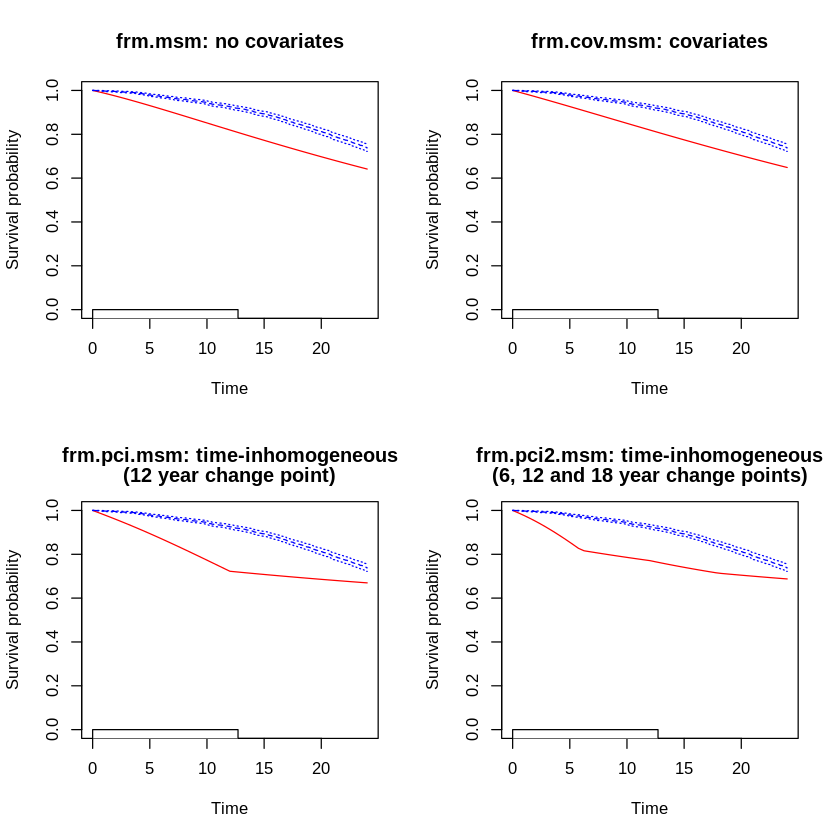

In [14]:
par(mfrow = c(2, 2))
plot.survfit.msm(frm.msm, main = "frm.msm: no covariates", mark.time = FALSE, legend.pos=c(0,0))
plot.survfit.msm(frm.cov.msm, main = "frm.cov.msm: covariates", mark.time = FALSE, legend.pos=c(0,0))
plot.survfit.msm(frm.pci.msm, mark.time = FALSE, legend.pos=c(0,0))
title("frm.pci.msm: time-inhomogeneous", line = 2)
title("(12 year change point)", line = 1)
frm.pci2.msm <- msm(STATE ~ YEARS, subject = RANDID, data = frmghm_ms, qmatrix = Q, 
                    pci = c(6,12,18), method = "BFGS", exacttimes = TRUE,
                    censor = 99, censor.states=c(1, 2, 3), 
                    control = list(fnscale=30000, maxit=10000))
plot.survfit.msm(frm.pci2.msm, mark.time = FALSE, legend.pos=c(0,0))
title("frm.pci2.msm: time-inhomogeneous", line = 2)
title("(6, 12 and 18 year change points)", line = 1)

The fit is much improved after adding censoring!  

Adding additional time-change points doesn't appear to help the fit, but covariates likely do, although the differences between the first two graphs are not readily apparent, the differences in the model fits are.

## Comparing Observed and Expected Prevalence

Works best when individuals are actually observed at the computed times, otherwise assumptions are made such as individuals are only observed at these times, or midpoints are assumed.

The observed prevalence of a state is simply calculated as the number of individuals known to be in that state, divided by the number of individuals whose state is known at that time, which ignores the information from individuals censored at earlier times (root of Kaplan-Meier estimation :))

In [15]:
# Need to look at how this is implemented by Gentleman et al. 1994 using prevalence.msm, and plot.prevalence.msm

## None of these models give an adequate fit

A more complex pattern of time-dependence or allowing transition intensities to depend on covariates would likely yield a better fit.

TO DO => Figure out how to allow transition intensities to depend on covariates!

## It is also possible to calculate the influence of each individual on the MLE

Using scoreresid.msm

## Extensions of msm and limitations

For continuously-observed processes: mstate (deWreede et al. 2010)

For Random Effects models (unexplained heterogeneity in transition intensities between individuals) - calculating likelihood often intractable with a few exceptions: tracking model - random effect acts on all intensities simultaneously (Satten 1999), or a discrete random effects distribution (Cook et al 2004)